## Project: Red Wine Quality Prediction 
### Francis Afuwah. Batch DS2312

## Introduction:
This analysis shall involve predicting the quality of Portuguese "Vinho Verde" wine only based on physicochemical properties, as no information shall be reported on grape types, wine brands, or prices. Correspondingly, the application of machine learning methodologies shall focus on the establishment of the model that perfectly discriminates the wines between 'good' and 'not good' for an arbitrary threshold in the quality. This job is done through a very detailed process of research, the selection of a variety of features, training of different types of models, and evaluation toward the determination key physicochemical factors that affect the quality of wines, just to have an insight toward wine production and quality assessment.

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

## 1. Data Preprocessing
1. Load the dataset
2. Check for missing values and handle them if necessary.
3. Encode categorical variables .
4. Split the dataset into features (X) and target variable (y).

In [2]:
# Load the dataset
wine_data = pd.read_csv("winequality-red.csv")

# Check for missing values
print(wine_data.isnull().sum())

# Separate features (X) and target variable (y)
X = wine_data.drop(columns=['quality'])
y = (wine_data['quality'] >= 7).astype(int)  # Binary classification: good (1), not good (0)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


##  2. Exploratory Data Analysis (EDA):
1. Analyze the distributions of features.
2. Check for correlations between features and the target variable.
3. Visualize relationships between variables using plots.

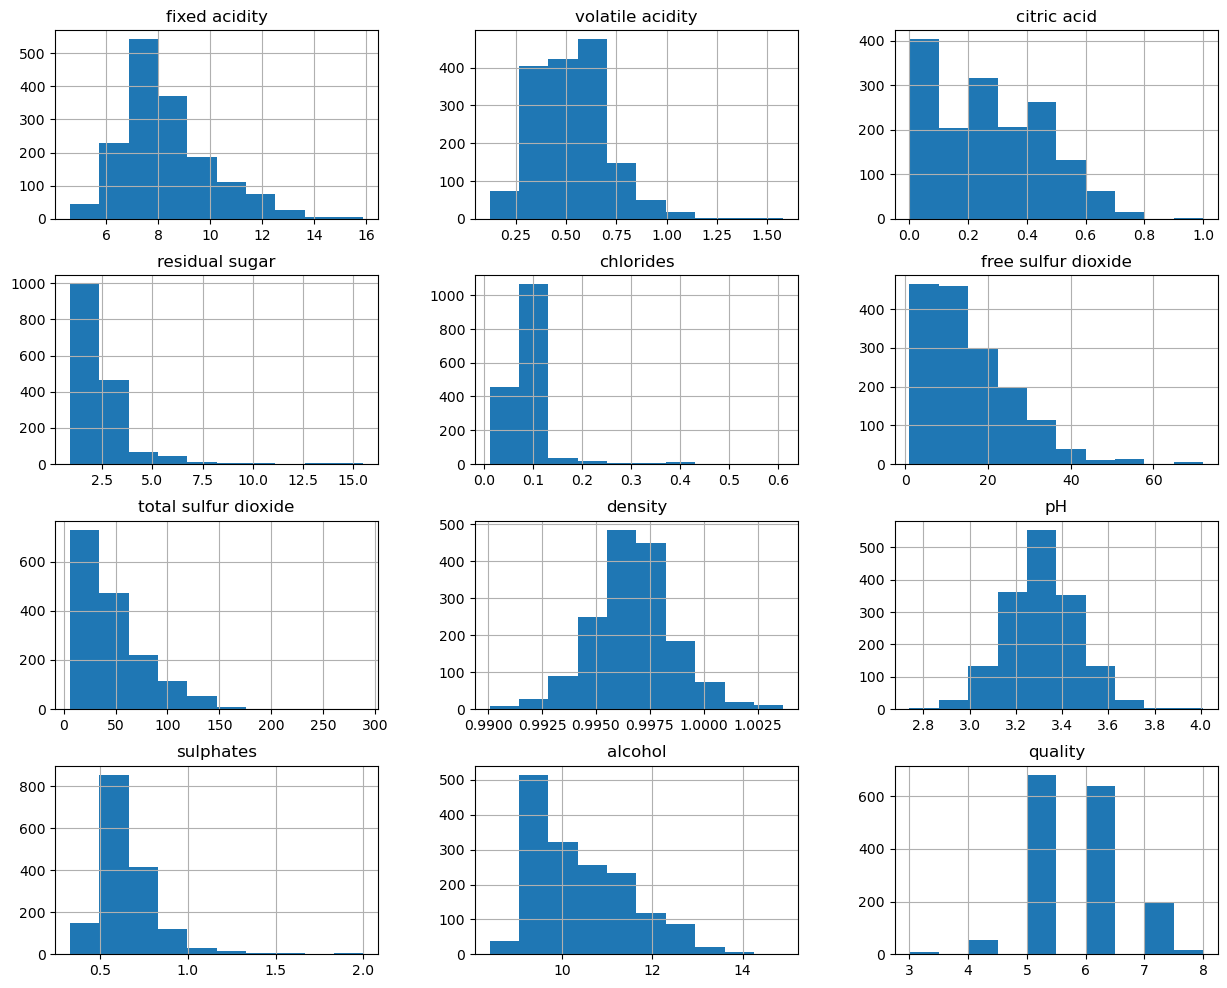

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [3]:
# Analyze distributions of features
wine_data.hist(figsize=(15, 12))
plt.show()

# Check for correlations
correlation_matrix = wine_data.corr()
print(correlation_matrix)

## 3. Feature Engineering:
To scale the features for the wine quality classification project. First thing, we scale features with StandardScaler because k-NN is very sensitive to feature scale. Then, proceed with training and checking the performance of this KNN classifier.

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate KNN model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of KNN Classifier:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy of KNN Classifier: 0.878125
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.63      0.40      0.49        47

    accuracy                           0.88       320
   macro avg       0.77      0.68      0.71       320
weighted avg       0.86      0.88      0.87       320



## 4. Model Selection and Training:
1. We use the Random Forest Classifier as it generally performs well with classification tasks and can handle non-linear relationships between features and target variable effectively.
Split the data into training and testing sets.Train the models on the training data.Tune hyperparameters using technique like random search.Evaluate models using metrics like accuracy, precision, recall, F1-score, ROC-AUC.

In [5]:
# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

In [6]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print(classification_report(y_test, y_pred))

Accuracy: 0.9
ROC AUC Score: 0.7388356324526537
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320



## Conclusion:

With the analysis of Red wine quality, what we wanted to ensure was the ability to identify all physicochemical properties that come together to build the perception of good wine quality. We undertook a preliminary process of our dataset and detected any missing values and their distribution of features. We convert quality scores to a binary classification task by distinguishing wines as 'good' or 'not good'.

In this study, the classification algorithms used included decision trees and KNN for the identification of the relation of physicochemical features with wine quality. So, all the above steps are thus quite valid; this in fact enhances the interpretability and performance of the model. Original content Such an analysis has led to plenty of interesting insights into key physicochemical properties associated with high quality in wines. The said insights may guide winemaking practices that support the winery towards optimization of their different processes towards the production of wines of high quality. Again, the developed classification models may be employed for classifying wines into their respective quality categories to assist consuming decisions.